<a href="https://www.kaggle.com/snap/amazon-fine-food-reviews/data">Data is available here</a>

In [1]:
ls

Review_ml-Copy1.ipynb                 Untitled.ipynb
Review_ml-Copy2.ipynb                 Untitled1.ipynb
Review_ml-Copy3.ipynb                 Untitled2.ipynb
Review_ml-Copy4.ipynb                 cache/
Review_ml-Copy5.ipynb                 crime-Copy1.ipynb
Review_ml-Copy6.ipynb                 crime-Copy2.ipynb
Review_ml-Copy7.ipynb                 crime.ipynb
Review_ml.ipynb                       sentiment_analysis_exploration.ipynb


In [2]:
ls ../../datasets/amazon_review

Reviews.csv      Reviews.csv.zip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set();

In [4]:
data = '../../datasets/amazon_review/Reviews.csv'

In [5]:
data = pd.read_csv(data)

In [7]:
print(data.shape)
data.head()

(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [8]:
# Chek if there is any missing data in Score and Text which we are intersted in exploring.

num_rows = data.shape[0]
print(np.unique(pd.isnull(data['Score'])))
print(np.unique(pd.isnull(data['Text'])))


[False]
[False]


In [9]:
print(np.unique(data['Score']))
print(np.bincount(data['Score']))

[1 2 3 4 5]
[     0  52268  29769  42640  80655 363122]


In [10]:
# Take proportion of each review score
score_pct = np.bincount(data['Score']) / data.shape[0]
print(score_pct)

[ 0.          0.09194763  0.05236835  0.07501047  0.14188483  0.63878871]


In [12]:
scores = pd.DataFrame(np.random.rand(1, 5), 
                      index=['scores'],
                      columns=pd.Index([1, 2, 3, 4, 5], name='Score'))
scores.iloc[0] = score_pct[1:]
scores

Score,1,2,3,4,5
scores,0.091948,0.052368,0.07501,0.141885,0.638789


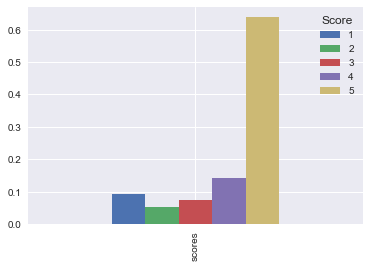

In [13]:
scores.plot.bar()

(array([  52268.,       0.,   29769.,       0.,       0.,   42640.,
              0.,   80655.,       0.,  363122.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

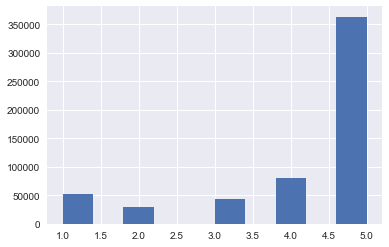

In [14]:
plt.hist(data['Score'])

In [79]:
# It seems like Score == 3 has pretty negative comment. 
print(data[data['Score'] == 3]['Text'].values[:10])

[ "This seems a little more wholesome than some of the supermarket brands, but it is somewhat mushy and doesn't have quite as much flavor either.  It didn't pass muster with my kids, so I probably won't buy it again."
 'The flavors are good.  However, I do not see any differce between this and Oaker Oats brand - they are both mushy.'
 'This is the same stuff you can buy at the big box stores.  There is nothing healthy about it.  It is just carbs and sugars.  Save your money and get something that at least has some taste.'
 "we're used to spicy foods down here in south texas and these are not at all spicy.  doubt very much habanero is used at all.  could take it up a notch or two."
 'Watch your prices with this.  While the assortment was good, and I did get this on a gold box purchase, the price for this was<br />$3-4 less at Target.'
 "If you're impulsive like me, then $6 is ok. Don't get me wrong, the quality of these babies is very good and I have no complaints. But in retrospect, th

In [80]:
# Score == 4 has pretty much positive 
# So we split the Text(Review) into ['Positive', 'Negative'] 
# If score <= 3: then the text associated with the score will be classified as "Negative"
# Else: the text will be as "Positive"
print(data[data['Score'] == 4]['Text'].values[:10])

[ 'This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch.'
 'I got a wild hair for taffy and ordered this five pound bag. The taffy was all very enjoyable with many flavors: watermelon, root beer, melon, peppermint, grape, etc. My only complaint is there was a bit too much red/black licorice-flavored pieces (just not my particular favorites). Between me, my kids, and my husband, this lasted only two weeks! I would recommend this brand of taffy -- it was a delightful treat.'
 'good flavor! these came securely packed... they were fresh and 